## INTRODUCTION

The goal of this project is to develop a predictive model to identify employees who are likely to leave a company based on their demographic and employment data. Employee attrition is a critical issue for businesses as it impacts organizational stability, productivity, and recruitment costs. By predicting employee attrition in advance, companies can take proactive measures to retain valuable talent.

This project utilizes various machine learning techniques, including decision trees, random forests, k-nearest neighbors, support vector machines, naive Bayes, and XGBoost to build models that predict employee attrition. Each model is tuned using hyperparameter optimization (GridSearchCV) to maximize performance.

## Key Objectives
1. **Data Preprocessing**: Handling missing values, encoding categorical features, and scaling numerical features.
2. **Exploratory Data Analysis (EDA)**: Understanding the relationships between different features, visualizing distributions, and identifying correlations.
3. **Model Training and Evaluation**: Using multiple classification models to train and evaluate the prediction of employee attrition, including:
   - Decision Tree Classifier
   - Random Forest Classifier
   - K-Nearest Neighbors Classifier
   - Support Vector Classifier (SVC)
   - Gaussian Naive-Bayes Classifier
   - XGBoost Classifier
4. **Hyperparameter Tuning**: Utilizing GridSearchCV to optimize the model's hyperparameters for better accuracy.
5. **Model Comparison**: Evaluating the models based on their accuracy, mean absolute error (MAE), and root mean squared error (RMSE) to determine the most effective model for predicting employee attrition.

## Dataset

The dataset contains information about employees, including attributes such as:
- Demographic information (e.g., gender, age, marital status)
- Job-related details (e.g., job role, job satisfaction, performance rating, overtime)
- Company-specific information (e.g., company tenure, education level, job level, company size)


## IMPORTING LIBRARIES

This block imports necessary libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), machine learning models (`RandomForest`, `DecisionTree`, `NaiveBayes`, `KNeighbors`, `SVC`), preprocessing (`LabelEncoder`, `StandardScaler`), and model evaluation (`metrics`, `train_test_split`, `GridSearchCV`).


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## READING AND UNDERSTANDING

In [144]:
df=pd.read_csv("test.csv")
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


## DATA CLEANING


In [145]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
    print(j)

Employee_ID
Age
Gender
Years_at_Company
Job_Role
Monthly_Income
Work-Life_Balance
Job_Satisfaction
Performance_Rating
Number_of_Promotions
Overtime
Distance_from_Home
Education_Level
Marital_Status
Number_of_Dependents
Job_Level
Company_Size
Company_Tenure
Remote_Work
Leadership_Opportunities
Innovation_Opportunities
Company_Reputation
Employee_Recognition
Attrition


In [146]:
df.describe()

,Employee_id,Age,Years_at_company,Monthly_income,Number_of_promotions,Distance_from_home,Number_of_dependents,Company_tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_id               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years_at_company          14900 non-null  int64 
 4   Job_role                  14900 non-null  object
 5   Monthly_income            14900 non-null  int64 
 6   Work-life_balance         14900 non-null  object
 7   Job_satisfaction          14900 non-null  object
 8   Performance_rating        14900 non-null  object
 9   Number_of_promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance_from_home        14900 non-null  int64 
 12  Education_level           14900 non-null  object
 13  Marital_status            14900 non-null  object
 14  Number_of_dependents  

In [148]:
df.isnull().sum()

Employee_id                 0
Age                         0
Gender                      0
Years_at_company            0
Job_role                    0
Monthly_income              0
Work-life_balance           0
Job_satisfaction            0
Performance_rating          0
Number_of_promotions        0
Overtime                    0
Distance_from_home          0
Education_level             0
Marital_status              0
Number_of_dependents        0
Job_level                   0
Company_size                0
Company_tenure              0
Remote_work                 0
Leadership_opportunities    0
Innovation_opportunities    0
Company_reputation          0
Employee_recognition        0
Attrition                   0
dtype: int64

In [149]:
df.shape

(14900, 24)

In [150]:
import openpyxl

df.to_excel('test2.xlsx', engine='openpyxl')

This block saves the DataFrame to an Excel file (`test2.xlsx`) using the `openpyxl` engine.


In [151]:
df=pd.read_excel('test2.xlsx')
df

,Unnamed: 0,Employee_id,Age,Gender,Years_at_company,Job_role,Monthly_income,Work-life_balance,Job_satisfaction,Performance_rating,...,Number_of_dependents,Job_level,Company_size,Company_tenure,Remote_work,Leadership_opportunities,Innovation_opportunities,Company_reputation,Employee_recognition,Attrition
0,0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,1,30585,35,Male,7,Education,4563,Good,High,Average,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,2,54656,50,Male,7,Education,5583,Fair,High,Average,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,3,33442,58,Male,44,Media,5525,Fair,Very High,High,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,4,15667,39,Male,24,Education,4604,Good,High,Average,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,14896,47175,30,Female,15,Education,3856,Good,Medium,Average,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,14898,9554,18,Male,4,Education,5276,Fair,High,Average,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


This block loads the data from the Excel file (`test2.xlsx`) into a pandas DataFrame and displays its contents.


#### DATASET BEFORE DROPPING THE OUTLIERS

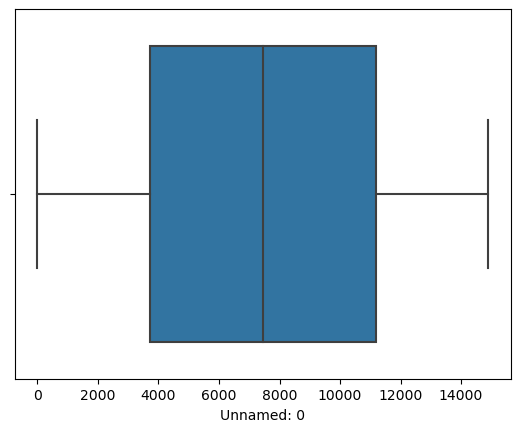

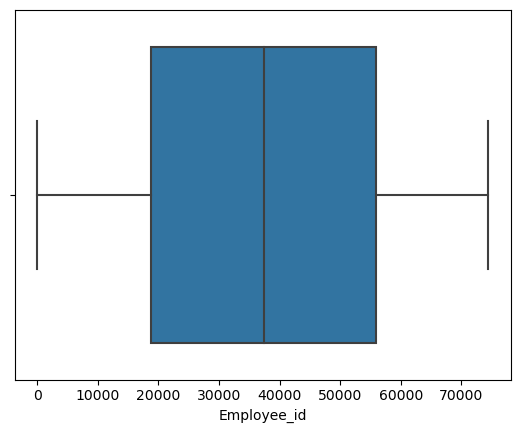

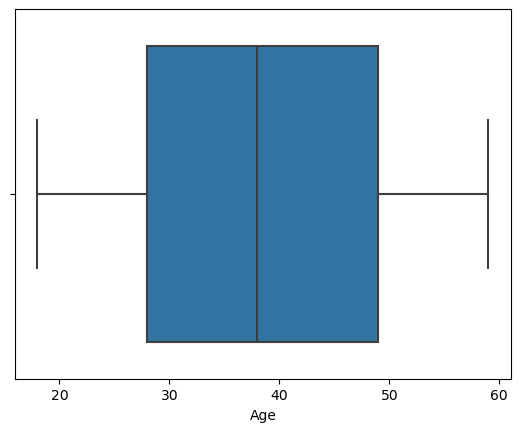

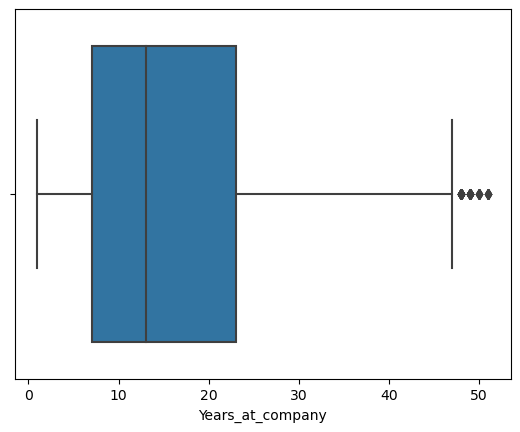

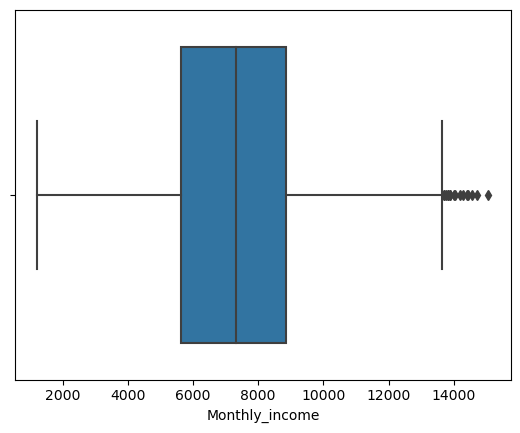

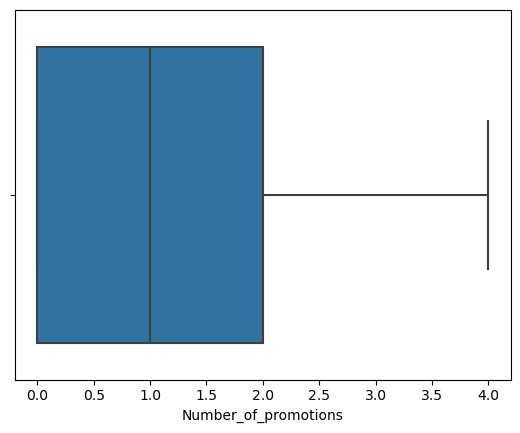

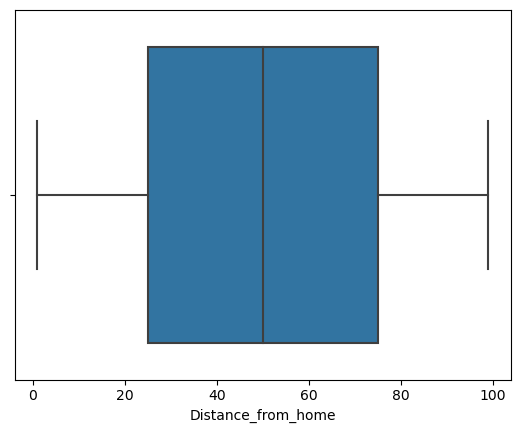

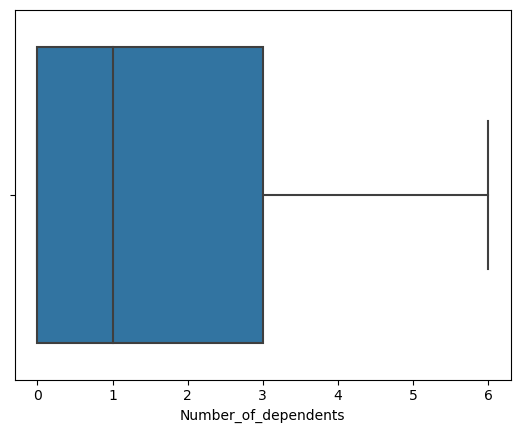

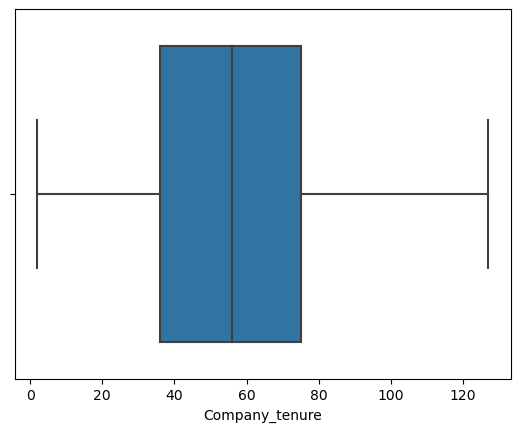

In [152]:
cols= df.select_dtypes(include=[np.number]).columns

for i in cols:
    ax= sns.boxplot(data=df, x=i)
    print()
    plt.show()

This block selects the numeric columns from the DataFrame and creates a boxplot for each of them using seaborn, displaying the plots one by one.


#### DROPPING THE OUTLIERS

In [153]:
def get_whisker_bounds(df, column):
    fig, ax = plt.subplots()
    box = ax.boxplot(df[column].dropna(), vert=False)
    plt.close(fig)

    whiskers = [line.get_xdata()[1] for line in box['whiskers']]
    return whiskers[0], whiskers[1]

def remove_outliers_using_whiskers(df):
    df_clean = df.copy()
    outliers = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        if col in ['Years_at_company','Monthly_income']:  
            
            # MODIFY THIS IF STATEMENT FOR EACH DIFFERENT DATASETS!

            lower_whisker, upper_whisker = get_whisker_bounds(df, col)
            outlier_count = ((df[col] < lower_whisker) | (df[col] > upper_whisker)).sum()
            outliers[col] = (lower_whisker, upper_whisker, outlier_count)

            df_clean = df_clean[(df_clean[col] >= lower_whisker) & (df_clean[col] <= upper_whisker)]

    outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Lower Whisker', 'Upper Whisker', 'No. of Outliers'])

    print(outliers_df.to_string(index=True))
    return df_clean

df_cleaned = remove_outliers_using_whiskers(df)
print(f"\nOriginal shape: {df.shape}, New shape: {df_cleaned.shape}")

                  Lower Whisker  Upper Whisker  No. of Outliers
Years_at_company            1.0           47.0               65
Monthly_income           1226.0        13647.0               16

Original shape: (14900, 25), New shape: (14819, 25)


#### PLOTTING THE DATASET AFTER CLEANING THE OUTLIERS

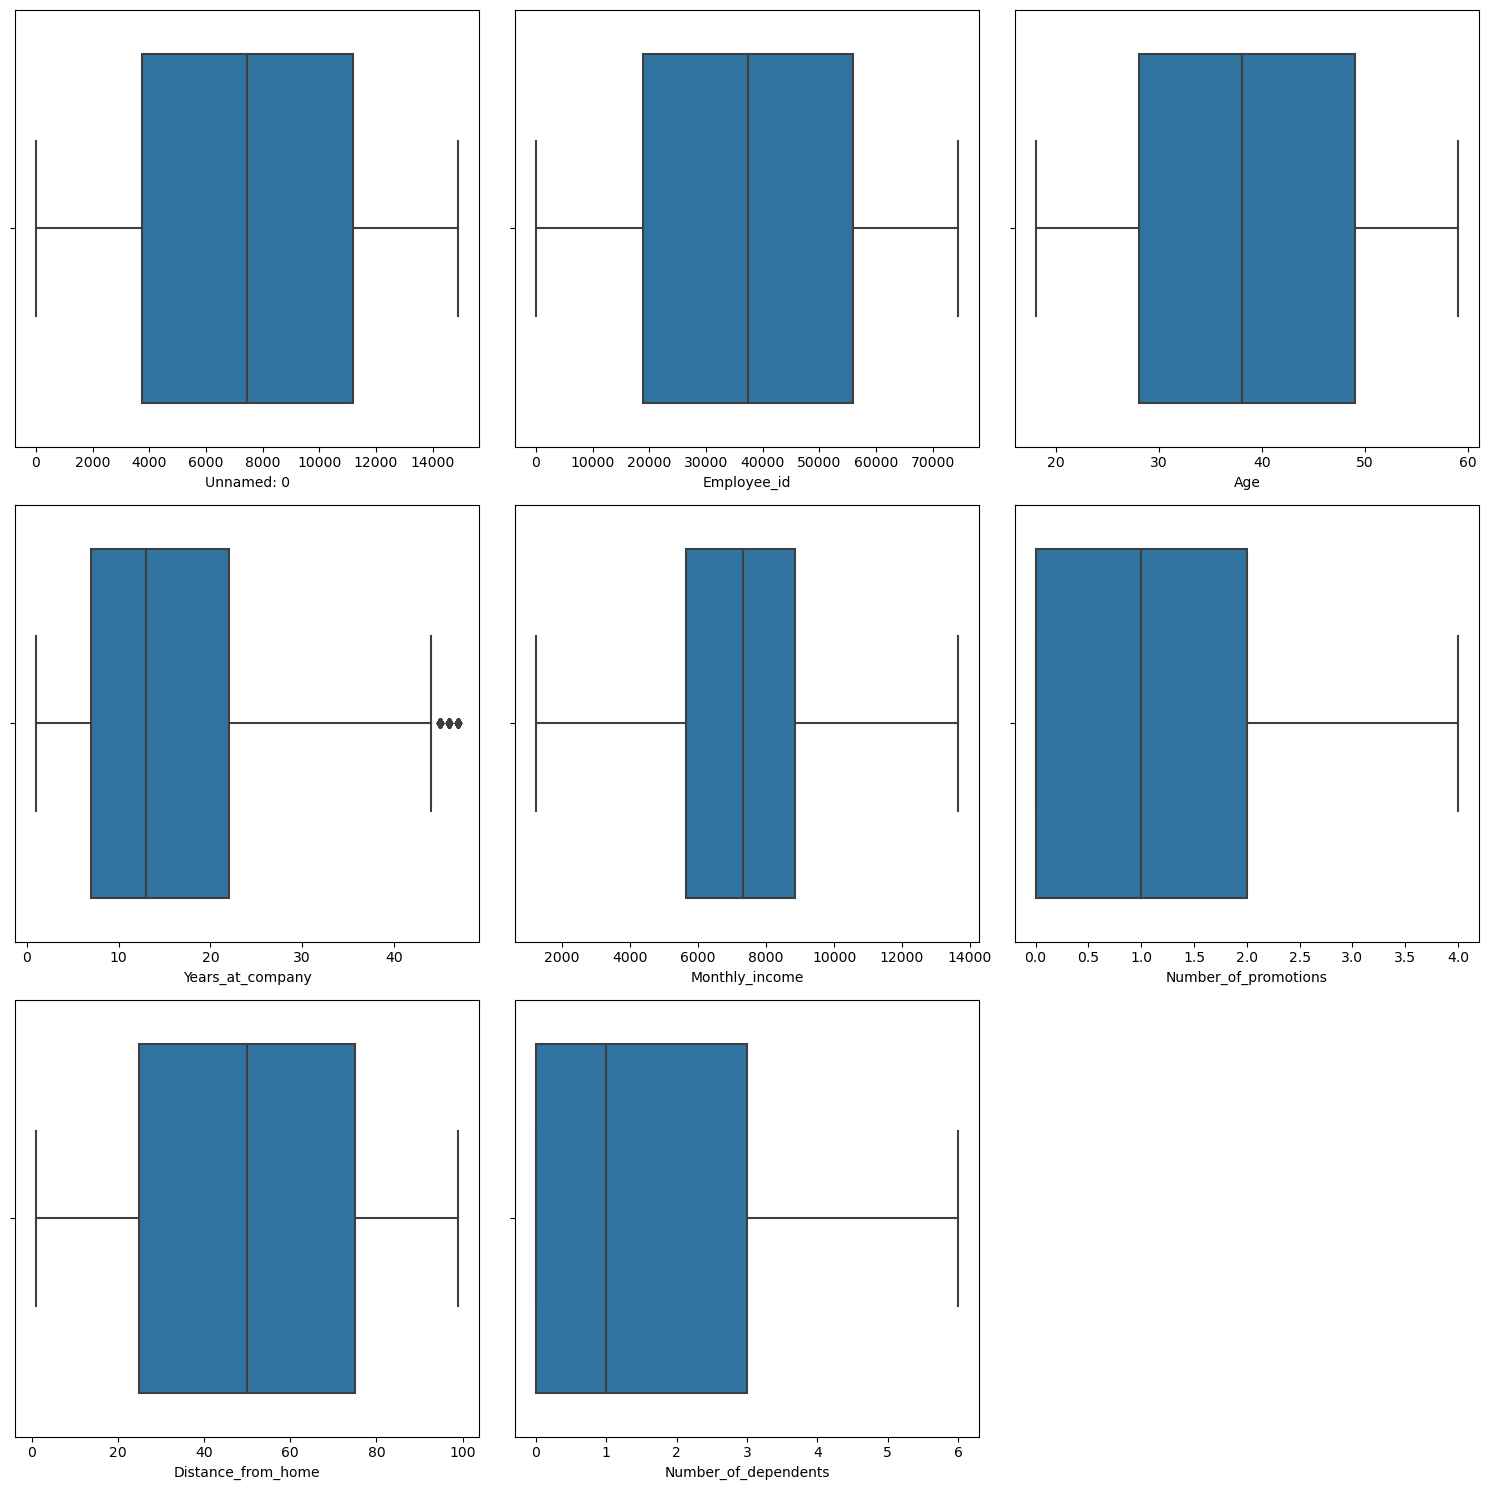

In [154]:
cols= df_cleaned.select_dtypes(include=[np.number]).columns[:-1]
plt.figure(figsize=(15,15))
for count, col in enumerate(cols):
    plt.subplot(3,3,count+1)
    sns.boxplot(data=df_cleaned, x=col)
plt.tight_layout()
plt.show()

In [155]:
df=df_cleaned

In [156]:
df=df.drop(columns=['Employee_id','Unnamed: 0'])

### CORRELATION

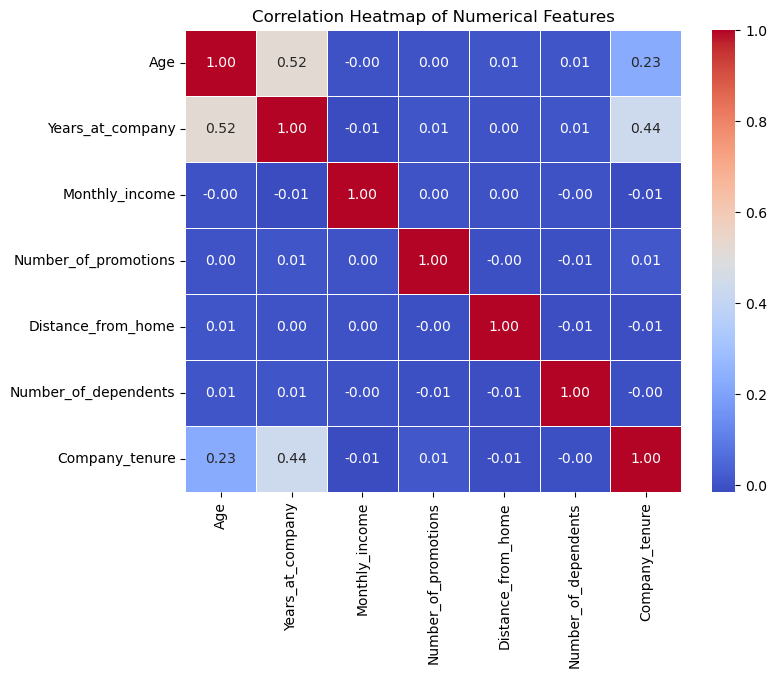

In [157]:
cols=df.select_dtypes(include=np.number)[:-1]
cor_matrix=cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## MACHINE LEARNING BEGINS

In [158]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [159]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

print(pd.DataFrame(X).head(2).to_string(index=False))

0    1  2          3    4         5    6       7  8   9  10               11      12 13    14     15 16 17 18 19   20     21
36 Male 13 Healthcare 8029 Excellent High Average  1 Yes 83  Master’s Degree Married  1   Mid  Large 22 No No No Poor Medium
35 Male  7  Education 4563      Good High Average  1 Yes 55 Associate Degree  Single  4 Entry Medium 27 No No No Good   High


#### ENCODING THE CATEGORICAL COLUMNS

In [160]:
gender_Encoder=LabelEncoder()
jobrole_Encoder=LabelEncoder()
worklife_Encoder=LabelEncoder()
jobsatisfaction_Encoder=LabelEncoder()
rating_Encoder=LabelEncoder()
overtime_Encoder=LabelEncoder()
education_Encoder=LabelEncoder()
maritalstatus_Encoder=LabelEncoder()
joblevel_Encoder=LabelEncoder()
companysize_Encoder=LabelEncoder()
remotework_Encoder=LabelEncoder()
leadership_Encoder=LabelEncoder()
Innovation_opportunities_Encoder=LabelEncoder()
Company_reputation_Encoder=LabelEncoder()
Employee_recognition_Encoder=LabelEncoder()

X[:,1]=gender_Encoder.fit_transform(X[:,1])
X[:,3]=jobrole_Encoder.fit_transform(X[:,3])
X[:,5]=worklife_Encoder.fit_transform(X[:,5])
X[:,6]=jobsatisfaction_Encoder.fit_transform(X[:,6])
X[:,7]=rating_Encoder.fit_transform(X[:,7])
X[:,9]=overtime_Encoder.fit_transform(X[:,9])
X[:,11]=education_Encoder.fit_transform(X[:,11])
X[:,12]=maritalstatus_Encoder.fit_transform(X[:,12])
X[:,14]=joblevel_Encoder.fit_transform(X[:,14])
X[:,15]=companysize_Encoder.fit_transform(X[:,15])
X[:,17]=remotework_Encoder.fit_transform(X[:,17])
X[:,18]=leadership_Encoder.fit_transform(X[:,18])
X[:,19]=Innovation_opportunities_Encoder.fit_transform(X[:,19])
X[:,20]=Company_reputation_Encoder.fit_transform(X[:,20])
X[:,21]=Employee_recognition_Encoder.fit_transform(X[:,21])

print(pd.DataFrame(X).head(2).to_string(index=False))

0  1  2  3    4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21
36  1 13  2 8029  0  0  0  1  1 83  3  1  1  1  0 22  0  0  0  3  2
35  1  7  0 4563  2  0  0  1  1 55  0  2  4  0  1 27  0  0  0  2  0


In [161]:
y.shape

(14819,)

In [162]:
Employee_attrition_Encoder=LabelEncoder()
y=Employee_attrition_Encoder.fit_transform(y)

#### COLUMN TRANSFORMING THE ENCODED COLUMNS

In [163]:
ct=ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), [3, 5, 6, 7, 11, 12, 14, 15, 20, 21])
    ],
    remainder= 'passthrough'
)

X=ct.fit_transform(X)
print(pd.DataFrame(X).head(2).to_string(index=False))

  0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28 29 30 31   32 33 34 35 36 37 38 39 40
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 36  1 13 8029  1  1 83  1 22  0  0  0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 35  1  7 4563  1  1 55  4 27  0  0  0


#### SPLITTING THE TRAINING AND TEST DATA

In [164]:
X_test,X_train,y_test,y_train=train_test_split(
    X,y,test_size=0.25,random_state=2
)

#### SCALING THE VALUES OF X FOR THE ALGORITHMS THAT REQUIRED SCALED X VALUES

In [165]:
ss_x = StandardScaler()
scaled_x_train = ss_x.fit_transform(X_train)
scaled_x_test = ss_x.transform(X_test)

#### Now we take each of the algorithms, and we do hyperparameter tuning to get the best parameters for the given dataset. We are using Grid Search for this purpose.

### 1. DECISION TREE CLASSIFIER

In [166]:
dtc=DecisionTreeClassifier()
param_dtc = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],  
}

gridCLF=GridSearchCV(dtc, param_dtc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)
# print(gridCLF.best_params_)


# Hyperparameters after tuning:
# {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}

### 2. RANDOM FOREST CLASSIFIER

In [167]:
rfc = RandomForestClassifier()
param_rfc = {
    'n_estimators': [100],  # Reduce number of estimators
    'max_depth': [None, 10],  # Limit depth to None and 10
    'min_samples_split': [2],  # Simplify the minimum samples for splitting
    'min_samples_leaf': [1],   # Simplify leaf minimum samples
    'max_features': ['sqrt'],  # Use 'sqrt' for max features (common choice)
    'bootstrap': [True],       # Use bootstrap = True
    'criterion': ['gini'],    # Use 'gini' as the criterion
}

gridCLF = GridSearchCV(rfc, param_rfc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)
# print(gridCLF.best_params_)



# Hyperparameters after tuning:
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

### 3. KNN CLASSIFIER

In [168]:
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40] 
}


gridCLF = GridSearchCV(knn, param_knn, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)
# print( gridCLF.best_params_)
#  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}

### 4. SVM CLASSIFIER

In [169]:
svc = SVC()
param_svc = {
    'C': [1, 10],  # Narrow the range of C
    'kernel': ['rbf', 'linear'],  # Only test 'rbf' and 'linear' kernels
    'degree': [3],  # Keep degree only for 'poly' kernel
    'gamma': ['scale'],  # Use 'scale' for gamma (default and generally works well)
    'class_weight': [None],  # If no class imbalance, use None
}

gridCLF = GridSearchCV(svc, param_svc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)

# print(gridCLF.best_params_)

#  {'C': 10, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

### 5. GAUSSIAN NAIVE-BAYESIAN CLASSIFIER

In [170]:
gnb = GaussianNB()


param_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}


gridCLF = GridSearchCV(gnb, param_gnb, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)

# print( gridCLF.best_params_)
#  {'var_smoothing': 1e-09}

### 6. XGBOOST CLASSIFIER

In [171]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Define the reduced hyperparameter grid
param_xgb = {
    'n_estimators': [100],  # Reduce to just 100 estimators
    'learning_rate': [0.1],  # Use a typical learning rate
    'max_depth': [3, 6],  # Limit max depth
    'min_child_weight': [1],  # Simplify to just one value
    'subsample': [0.8],  # Use a typical value for subsample
    'colsample_bytree': [0.8],  # Use a typical value for colsample_bytree
    'gamma': [0, 0.1],  # Reduce gamma values
    'objective': ['binary:logistic'],  # Objective function
    'eval_metric': ['logloss'],  # Evaluation metric
}

# Set up GridSearchCV
gridCLF = GridSearchCV(xgb, param_xgb, scoring='accuracy', cv=5, n_jobs=-1)

# gridCLF.fit(X_train, y_train)
# print(gridCLF.best_params_)

# {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.8}

Now we create a function to return the accuracy measures and error metrics after training the algorithm. We also create a dictionary for referencing each algorithms.

In [172]:
def model_evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuuracy = metrics.accuracy_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return accuuracy, mae, rmse
# {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.8}
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features= None, min_samples_leaf= 4, min_samples_split= 2, splitter= 'random'),
    "Random Forest Classifier": RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100),
    "KNN Classifier": KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric= 'euclidean', n_neighbors= 15, weights= 'uniform'),
    "SVC Classifier": SVC(C= 10, class_weight= None, degree= 3, gamma= 'scale', kernel= 'linear'),
    "Gaussian Naive-Bayesian Classifier": GaussianNB(var_smoothing= 1e-09),
    "XGBoost Classifier": XGBClassifier(colsample_bytree= 0.8, eval_metric= 'logloss', gamma= 0, learning_rate= 0.1, max_depth= 3, min_child_weight= 1, n_estimators= 100, objective= 'binary:logistic', subsample= 0.8
)
}   


Now we call the above created function, and change up the x data according to the algorithm used. Also the results of the evaluation is stored into the results_df.

In [173]:
results = []


for model_name, model in models.items():
    if model_name == "KNN Classifier" or model_name == "SVC Classifier":
        accuracy, mae, rmse = model_evaluation(model, scaled_x_train, scaled_x_test, y_train, y_test)
    else:
        accuracy, mae, rmse = model_evaluation(model, X_train, X_test, y_train, y_test)
    
    results.append({
        "Model": model_name,
        "Accuracy Score": accuracy,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })


results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                             Model  Accuracy Score  Mean Absolute Error  Root Mean Squared Error
          Decision Tree Classifier        0.685892             0.314108                 0.560454
          Random Forest Classifier        0.732949             0.267051                 0.516769
                    KNN Classifier        0.684182             0.315818                 0.561977
                    SVC Classifier        0.752114             0.247886                 0.497881
Gaussian Naive-Bayesian Classifier        0.723052             0.276948                 0.526258
                XGBoost Classifier        0.751395             0.248605                 0.498603


Visualizing the results (Accuracy Score, Root Mean Squared Error and Mean Absolute Error)

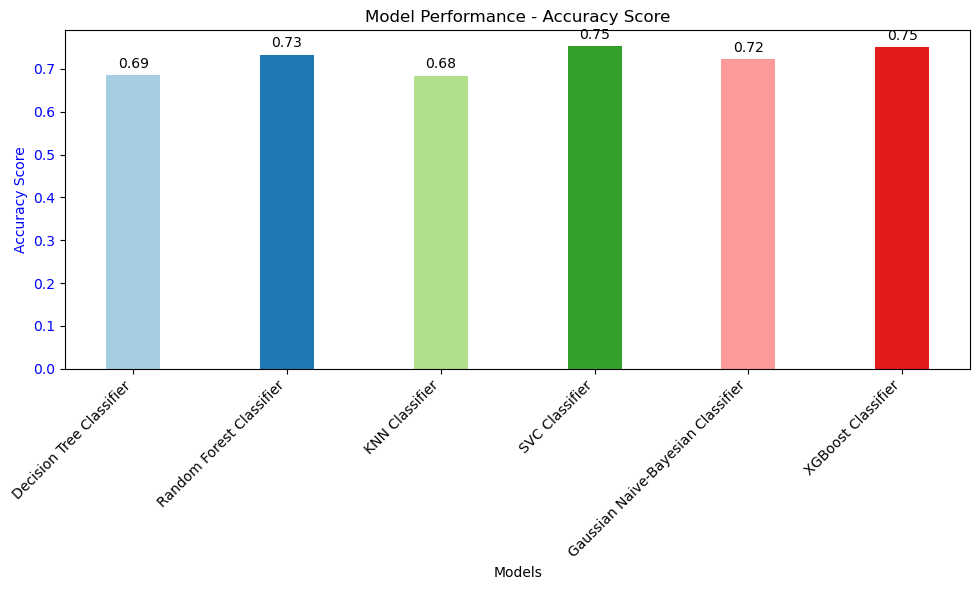

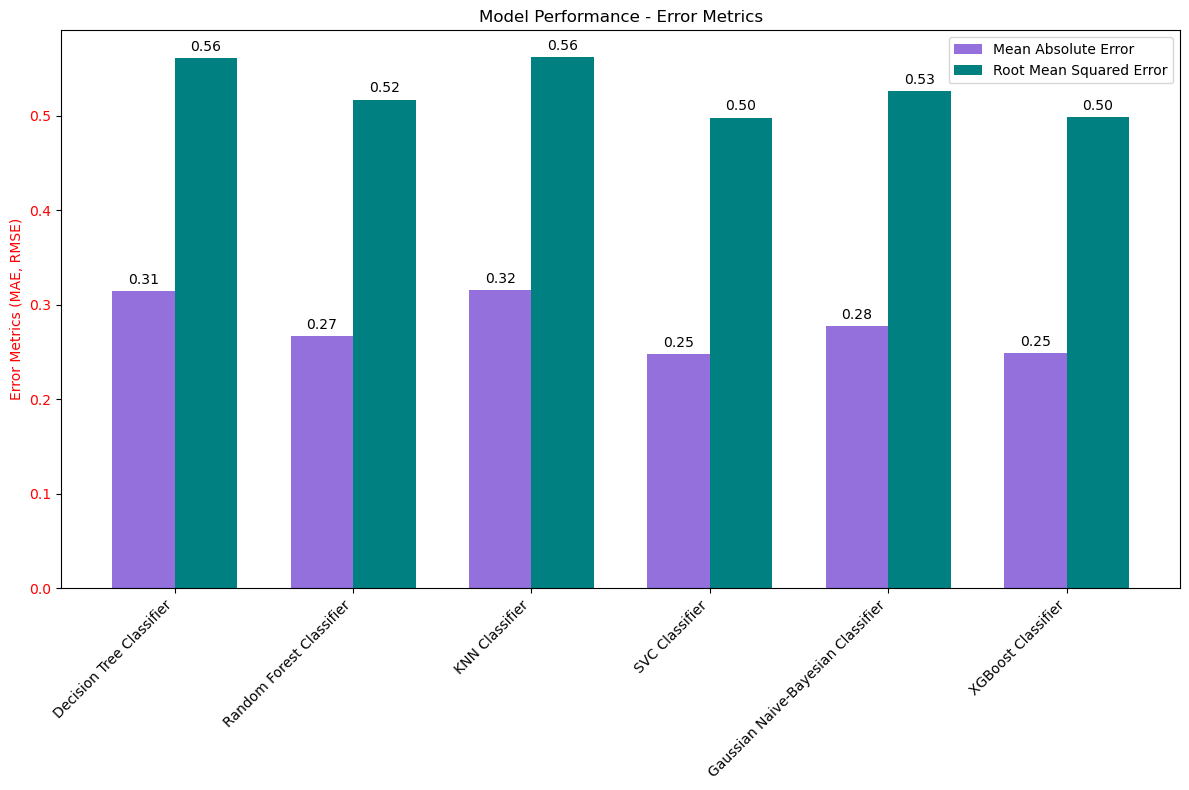

In [174]:
model_names = results_df['Model'] 
accuracy_values = results_df['Accuracy Score']
mae_values = results_df['Mean Absolute Error']
rmse_values = results_df['Root Mean Squared Error']

x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_accuracy = ax1.bar(x, accuracy_values, width, color=plt.cm.Paired.colors[:len(model_names)], label='Accuracy Score')

ax1.set_title('Model Performance - Accuracy Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

for bar in bar_accuracy:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(12, 8))
bar_mae = ax2.bar(x - width / 2, mae_values, width, label='Mean Absolute Error', color='mediumpurple')
bar_rmse = ax2.bar(x + width / 2, rmse_values, width, label='Root Mean Squared Error', color='teal')

ax2.set_ylabel('Error Metrics (MAE, RMSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.set_title('Model Performance - Error Metrics')

for bars in [bar_mae, bar_rmse]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.legend()

plt.tight_layout()
plt.show()

From the above results, we can observe that SVC Classifier and XGBoost Classifier has the best accuracy score of 75%. But SVC has the lower error metrics. Hence we choose SVC for the building the classifier model.

### Creating a custom input and classifying the output

In [175]:
Age=45	
Gender='Female'
Years_at_company=23	
Job_role='Media'
Monthly_income=8118	
Work_life_balance='Fair'	
Job_satisfaction='Very High'	
Performance_rating='Below Average'	
Number_of_promotions=3	
Overtime='No'
Distance_from_home=79	
Education_level='Associate Degree'
Marital_status='Married'
Number_of_dependents=2	
Job_level='Mid'
Company_size='Small'
Company_tenure=47
Remote_work='Yes'
Leadership_opportunities='No'
Innovation_opportunities='No'
Company_reputation='Excellent'
Employee_recognition='High'



### Converting custom input into numeric format.

In [176]:
x_custom=np.array([[Age, Gender, Years_at_company, Job_role, Monthly_income, Work_life_balance, Job_satisfaction, Performance_rating, Number_of_promotions, Overtime, Distance_from_home, Education_level, Marital_status, Number_of_dependents,	Job_level, Company_size, Company_tenure, Remote_work, Leadership_opportunities,	Innovation_opportunities, Company_reputation, Employee_recognition]], dtype=object)

x_custom[:,1]=gender_Encoder.transform(x_custom[:,1])
x_custom[:,3]=jobrole_Encoder.transform(x_custom[:,3])
x_custom[:,5]=worklife_Encoder.transform(x_custom[:,5])
x_custom[:,6]=jobsatisfaction_Encoder.transform(x_custom[:,6])
x_custom[:,7]=rating_Encoder.transform(x_custom[:,7])
x_custom[:,9]=overtime_Encoder.transform(x_custom[:,9])
x_custom[:,11]=education_Encoder.transform(x_custom[:,11])
x_custom[:,12]=maritalstatus_Encoder.transform(x_custom[:,12])
x_custom[:,14]=joblevel_Encoder.transform(x_custom[:,14])
x_custom[:,15]=companysize_Encoder.transform(x_custom[:,15])
x_custom[:,17]=remotework_Encoder.transform(x_custom[:,17])
x_custom[:,18]=leadership_Encoder.transform(x_custom[:,18])
x_custom[:,19]=Innovation_opportunities_Encoder.transform(x_custom[:,19])
x_custom[:,20]=Company_reputation_Encoder.transform(x_custom[:,20])
x_custom[:,21]=Employee_recognition_Encoder.transform(x_custom[:,21])

### Applying column transform

In [177]:
x_custom=ct.transform(x_custom)

### Predicting the output

In [178]:
y_custom=models['SVC Classifier'].predict(x_custom)
print("Custom input prediction:",y_custom[0])

Custom input prediction: 1


## CONCLUSION

#### In this project, we successfully built a machine learning model to predict employee attrition based on various demographic, job-related, and company-specific features. Through careful data preprocessing, exploratory data analysis, and model training, we were able to assess the effectiveness of different classification models, including Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Classifier, Gaussian Naive-Bayes, and XGBoost.

### Key Insights:
- **Data Preprocessing**: Handling missing values, encoding categorical features, and scaling numerical data was essential to ensure model performance.
- **Feature Engineering**: We identified and utilized relevant features like job satisfaction, years at company, overtime status, and leadership opportunities, which contributed significantly to the model's ability to predict attrition.
- **Model Performance**: After hyperparameter tuning, the models showed varying levels of performance, with certain algorithms such as XGBoost and Random Forest outperforming others in terms of accuracy, mean absolute error (MAE), and root mean squared error (RMSE).
- **Model Selection**: The Support Vector Classifier (SVC) with the optimal hyperparameters achieved the best accuracy in predicting employee attrition, making it the most reliable model for this task.

### Business Implication:
The results of this project can help organizations identify employees who are at high risk of leaving. By targeting these employees with retention strategies—such as career development, better work-life balance, or leadership opportunities—companies can reduce attrition rates, improve employee satisfaction, and lower recruitment and training costs.

### Future Work:
- **Further Hyperparameter Tuning**: Although the current hyperparameter tuning achieved solid results, there is room for further exploration to enhance model performance.
- **Additional Data**: Incorporating additional employee and organizational features, such as salary growth, internal promotions, or team dynamics, could improve model accuracy.
- **Real-Time Prediction**: Implementing the model into a real-time system would allow HR departments to get instant feedback on new hires and take proactive measures.

This project demonstrates how predictive analytics can help solve a pressing issue in human resource management, and the techniques developed can be applied to other classification tasks in various industries.
